In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import random as rnd
import time

from scipy.stats import binom
from sklearn.model_selection import train_test_split

from intelligent_sampling import subsample_clusterbased
from utils import test_kolmogorov_smirnov

In [20]:
# Here we generate some random column data within range 0-1. There's no higher scientific process behind it.
# Different techniques are only used to have columns with different distributions and statistical properties

col_length = 5000

# Uniform distributed column
column_1 = [rnd.uniform(0,1) for x in range(col_length)]

# Binomial distributed columns - standardized to 0-1 range
column_2 = [binom.rvs(n = 16, p = 0.75) / 16 for x in range(col_length)]

# Normal distributed columns - standardized to 0-1 range
column_3 = [rnd.normalvariate(mu=0.5, sigma=0.075) for x in range(col_length)]
assert(max(column_3) < 1)
assert(min(column_3) > 0)

# Create Dataframe of Data
df = pd.DataFrame({"col1": column_1,
                   "col2": column_2,
                   "col3": column_3})

print(df.head(3))

# We select Bivariate data, to enable a vizual comparison of the generated subsamples by plotting them vs the original data density
values = df[['col1', 'col2']].values
df_old = df[['col1', 'col2']].copy()

       col1    col2      col3
0  0.060023  0.6875  0.494488
1  0.884322  0.6875  0.430413
2  0.605774  0.8750  0.548828


In [21]:
# Sample using cluster based sampling
t = time.time()
subsample_cluster_a, subsample_cluster_b = subsample_clusterbased(data=values, test_size=0.1, n_cluster=100)
print(f'time {time.time() -t}')
print(test_kolmogorov_smirnov(split_a=subsample_cluster_a, split_b=subsample_cluster_b))

time 0.7359979152679443
KstestResult(statistic=0.015130230522994727, pvalue=0.999910464249643)


In [22]:
# Sample using sklearn train_test_split
t = time.time()
subsample_sklearn_a, subsample_sklearn_b = train_test_split(values, test_size=0.1)
print(f'time {time.time() -t}')
print(test_kolmogorov_smirnov(split_a=subsample_sklearn_a, split_b=subsample_sklearn_b))

time 0.003003358840942383
KstestResult(statistic=0.035333333333333335, pvalue=0.6176509248857719)


In [23]:
# prepare dataframes of created subsample for vizual analysis
df_split_a_sklearn = pd.DataFrame(subsample_sklearn_a, columns=['A', 'B'])
df_split_b_sklearn = pd.DataFrame(subsample_sklearn_b, columns=['A', 'B'])

df_split_a_cluster = pd.DataFrame(subsample_cluster_a, columns=['A', 'B'])
df_split_b_cluster = pd.DataFrame(subsample_cluster_b, columns=['A', 'B'])

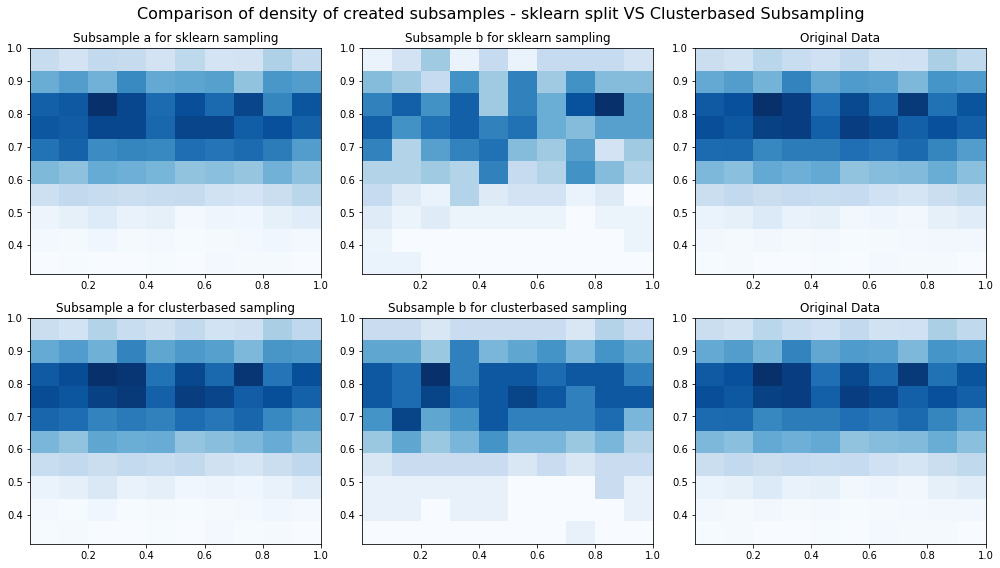

In [28]:
# 2d Hist Plot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14,8))

param_bins = 10
param_range = [[min(df_old.col1.values),1], [min(df_old.col2.values),1]]
param_density = True

axs[0][0].hist2d(x=df_split_a_sklearn.A.values, y=df_split_a_sklearn.B.values, bins=param_bins, cmap='Blues', range=param_range, density=param_density)
axs[0][1].hist2d(x=df_split_b_sklearn.A.values, y=df_split_b_sklearn.B.values, bins=param_bins, cmap='Blues', range=param_range, density=param_density)
axs[1][0].hist2d(x=df_split_a_cluster.A.values, y=df_split_a_cluster.B.values, bins=param_bins, cmap='Blues', range=param_range, density=param_density)
axs[1][1].hist2d(x=df_split_b_cluster.A.values, y=df_split_b_cluster.B.values, bins=param_bins, cmap='Blues', range=param_range, density=param_density)
axs[0][2].hist2d(x=df_old.col1.values, y=df.col2.values, bins=param_bins, cmap='Blues', range=param_range, density=param_density)
axs[1][2].hist2d(x=df_old.col1.values, y=df.col2.values, bins=param_bins, cmap='Blues', range=param_range, density=param_density)

axs[0][0].title.set_text("Subsample a for sklearn sampling")
axs[0][1].title.set_text("Subsample b for sklearn sampling")
axs[1][0].title.set_text("Subsample a for clusterbased sampling")
axs[1][1].title.set_text("Subsample b for clusterbased sampling")
axs[0][2].title.set_text("Original Data")
axs[1][2].title.set_text("Original Data")

for _help in axs:
    for ax in _help:
        ax.set(xlim=(min(df_old.col1.values), 1), ylim=(min(df_old.col2.values), 1))

fig.suptitle('Comparison of density of created subsamples - sklearn split VS Clusterbased Subsampling', fontsize=16)
fig.tight_layout()
plt.show()